In [1]:
#check_results.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 18 October 2017.
#evolve a handful of particles having 1e-6 < e < 1e-2 particles for 2e4 orbits
#and show that the fractional variations in a,e,wt are tiny

In [33]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [34]:
#restore saved data & compare
from helper_fns import *
execfile('inputs.py')
a, e, wt, M, times = restore_output(output_folder)
r, t, vr, vt = elem2coords(J2, Rp, a, e, wt, M, sort_particle_longitudes=False)

In [35]:
print len(times), times.max()

10001 2000.0


In [36]:
idx = 0
rp = r[:, idx].flatten()
tp = t[:, idx].flatten()
print len(times), len(rp), len(tp)
a0 = a[0, idx][0]
e0 = e[0, idx][0]
q0 = a0*(1.0 - e0)
Q0 = a0*(1.0 + e0)
print a0, e0, q0, Q0

10001 10001 10001
1.0 0.190575737283 0.809424262717 1.19057573728


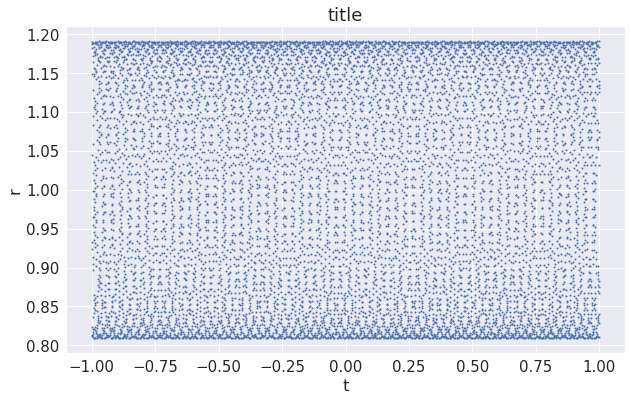

In [40]:
#plot r(t)
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(tp/np.pi, rp, marker='o', markersize=2, linestyle='none')
ax.set_title('title')
ax.set_xlabel('t')
ax.set_ylabel('r')

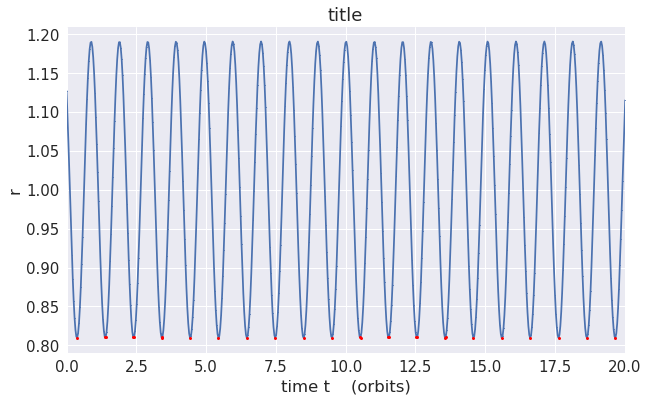

In [48]:
#plot r(time)
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(times/(2.0*np.pi), rp, marker='o', markersize=1, linestyle='-')
ax.set_title('title')
ax.set_xlabel('time t    (orbits)')
ax.set_ylabel('r')
ax.set_xlim(0, 20)
tm_peri = (rp < 1.002*q0)
ax.plot(times[tm_peri]/(2.0*np.pi), rp[tm_peri], marker='o', markersize=3, linestyle='none', color='red')

(0, 100)

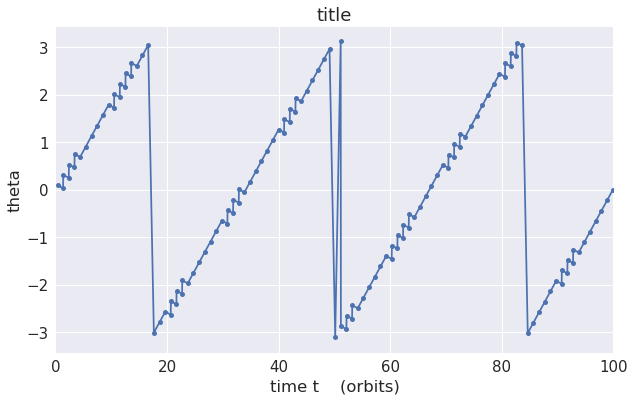

In [49]:
#plot r(time)
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(times[tm_peri]/(2.0*np.pi), tp[tm_peri], marker='o', markersize=5, linestyle='-')
ax.set_title('title')
ax.set_xlabel('time t    (orbits)')
ax.set_ylabel('theta')
ax.set_xlim(0, 100)

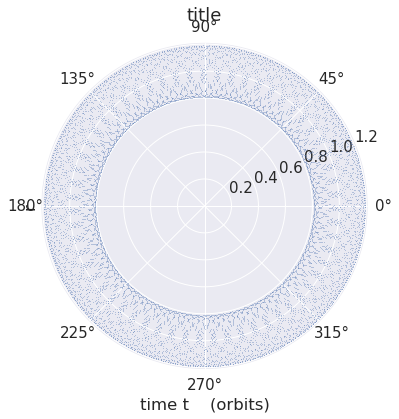

In [46]:
#plot r(time) polar
f, ax = plt.subplots(figsize=(10, 6), subplot_kw={'polar':True})
ax.plot(tp, rp, marker='.', markersize=1, linestyle='none')
ax.set_title('title')
ax.set_xlabel('time t    (orbits)')
ax.set_ylabel('r')


In [ ]:
idx = (rp < 0.99*q0)

In [ ]:
#plot final |de/e| versus initial e
f, ax = plt.subplots(figsize=(10, 6))
de = np.abs(e[-1] - e[0])/e[0]
p = sns.regplot(e[0], de, ax=ax, fit_reg=False, scatter_kws={'alpha':1.0, 's': 26}, marker='o', color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(8.0e-7, 2.0e-2)
ax.set_ylim(2.0e-12, 2.0e-6)
ax.set_title('fractional e variations')
ax.set_xlabel('initial eccentricity')
ax.set_ylabel('final $|\Delta e/e|$')

In [ ]:
#compute maximum change in wt
dwt = np.zeros_like(wt)
for tm in range(len(times)):
    dwt[tm] = wt[tm] - wt[0]
print np.abs(dwt).max()

In [ ]:
#plot dwt vs time
f, ax = plt.subplots(figsize=(10, 6))
for tm in range(len(times)):
    dwt = np.abs(wt[tm] - wt[0])
    time = np.zeros_like(dwt) + times[tm]/(2.0*np.pi)
    p = sns.regplot(time, dwt, ax=ax, fit_reg=False, scatter_kws={'alpha':1.0, 's': 8}, marker='o', color='black')
ax.set_yscale('log')
ax.set_xlim(0, 1.0e4)
ax.set_ylim(1.0e-15, 2.0e-7)
ax.set_title('wt variations')
ax.set_xlabel('time t    (orbits)')
ax.set_ylabel('$|\Delta wt|$')

In [ ]:
#plot final |dwt| versus initial e
f, ax = plt.subplots(figsize=(10, 6))
dwt = np.abs(wt[-1] - wt[0])
p = sns.regplot(e[0], dwt, ax=ax, fit_reg=False, scatter_kws={'alpha':1.0, 's': 26}, marker='o', color='black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(8.0e-7, 2.0e-2)
ax.set_ylim(2.0e-13, 2.0e-7)
ax.set_title('wt variations')
ax.set_xlabel('initial eccentricity')
ax.set_ylabel('final $|\Delta wt|$')